<a href="https://colab.research.google.com/github/etwalsaado/Practice/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Pandas:", pd.__version__)

Pandas: 2.2.2


In [129]:
import os
if not os.path.exists("cleaned.csv"):
  print("creating now cleaned.csv")
  dates = pd.date_range("2013-01-01", periods=365, freq='D')
  consumption = 50 + 10*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,3,len(dates))
  temp = 20 + 5*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,2,len(dates))
  df = pd.DataFrame({"date": dates, "consumption": consumption.round(2), "temp": temp.round(2)})
  df.loc[5, 'consumption'] = np.nan
  df.loc[10, 'temp'] = np.nan
  df = pd.concat([df, df.iloc[20:22]])
  df.to_csv("cleaned.csv", index=False)
  print("saved cleaned.csv")
else:
  print("we have cleaned.csv")

we have cleaned.csv


In [130]:
df = pd.read_csv("cleaned.csv", parse_dates=['date'])
display(df.head())
display(df.info())
print(df.describe())

,date,consumption,temp
0,2013-01-01,48.87,17.60
1,2013-01-02,45.84,20.29
2,2013-01-03,50.16,17.71
3,2013-01-04,51.48,23.94
4,2013-01-05,45.42,23.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         367 non-null    datetime64[ns]
 1   consumption  366 non-null    float64       
 2   temp         366 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


None

                                date  consumption        temp
count                            367   366.000000  366.000000
mean   2013-07-01 02:52:38.583106304    50.186530   20.236339
min              2013-01-01 00:00:00    34.260000   10.330000
25%              2013-03-31 12:00:00    43.427500   16.492500
50%              2013-07-01 00:00:00    50.430000   20.465000
75%              2013-09-30 12:00:00    56.862500   23.667500
max              2013-12-31 00:00:00    68.580000   29.930000
std                              NaN     7.835397    4.243684


In [131]:
df_dropany = df.dropna(axis=0, how='any').copy()
print("before rows:", len(df), "after rows:", len(df_dropany))

before rows: 367 after rows: 365


In [132]:
df_fill_const = df.fillna(value=0)
df_fill_mean = df.copy()
df_fill_mean['consumption'] = df_fill_mean['consumption'].fillna(df_fill_mean['consumption'].mean())
df_fill_ffill = df.fillna(method='ffill')
df_fill_bfill = df.fillna(method='bfill')
display(df_fill_const)
display(df_fill_mean)
display(df_fill_ffill)

/tmp/ipython-input-807402292.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill_ffill = df.fillna(method='ffill')
/tmp/ipython-input-807402292.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill_bfill = df.fillna(method='bfill')


,date,consumption,temp
0,2013-01-01,48.87,17.60
1,2013-01-02,45.84,20.29
2,2013-01-03,50.16,17.71
3,2013-01-04,51.48,23.94
4,2013-01-05,45.42,23.76
...,...,...,...
362,2013-12-29,51.53,17.51
363,2013-12-30,48.74,21.19
364,2013-12-31,50.50,19.45
365,2013-01-21,56.89,19.88


,date,consumption,temp
0,2013-01-01,48.87,17.60
1,2013-01-02,45.84,20.29
2,2013-01-03,50.16,17.71
3,2013-01-04,51.48,23.94
4,2013-01-05,45.42,23.76
...,...,...,...
362,2013-12-29,51.53,17.51
363,2013-12-30,48.74,21.19
364,2013-12-31,50.50,19.45
365,2013-01-21,56.89,19.88


,date,consumption,temp
0,2013-01-01,48.87,17.60
1,2013-01-02,45.84,20.29
2,2013-01-03,50.16,17.71
3,2013-01-04,51.48,23.94
4,2013-01-05,45.42,23.76
...,...,...,...
362,2013-12-29,51.53,17.51
363,2013-12-30,48.74,21.19
364,2013-12-31,50.50,19.45
365,2013-01-21,56.89,19.88


In [133]:
print(len(df))
df_drop_dup = df.drop_duplicates()
print(len(df_drop_dup))

367
365


In [134]:
display(df.dtypes)

,0
date,datetime64[ns]
consumption,float64
temp,float64


In [135]:
df_strnum = df.copy()
df_strnum.loc[0, 'consumption'] = '1,234.5'
def to_float(x):
  try:
    if isinstance(x, str):
      return float(x.replace(',', '.'))
  except:
    return np.nan
df_strnum['consumption_num'] = df_strnum['consumption'].apply(to_float)
display(df_strnum[['consumption', 'consumption_num']])

/tmp/ipython-input-2883549386.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1,234.5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_strnum.loc[0, 'consumption'] = '1,234.5'


,consumption,consumption_num
0,"1,234.5",NaN
1,45.84,NaN
2,50.16,NaN
3,51.48,NaN
4,45.42,NaN
...,...,...
362,51.53,NaN
363,48.74,NaN
364,50.5,NaN
365,56.89,NaN


In [136]:
df_dates = df.copy()
df_dates['date_str'] = df_dates['date'].dt.strftime('%d/%m/%Y')
df_dates['date_parsed'] = pd.to_datetime(df_dates['date_str'], format='%d/%m/%Y', errors='coerce')
display(df_dates[['date', 'date_str', 'date_parsed']])

,date,date_str,date_parsed
0,2013-01-01,01/01/2013,2013-01-01
1,2013-01-02,02/01/2013,2013-01-02
2,2013-01-03,03/01/2013,2013-01-03
3,2013-01-04,04/01/2013,2013-01-04
4,2013-01-05,05/01/2013,2013-01-05
...,...,...,...
362,2013-12-29,29/12/2013,2013-12-29
363,2013-12-30,30/12/2013,2013-12-30
364,2013-12-31,31/12/2013,2013-12-31
365,2013-01-21,21/01/2013,2013-01-21


In [137]:
df = pd.read_csv("cleaned.csv", parse_dates=['date'])
print(len(df))
print(df.isnull().sum())
print(df.duplicated().sum())

367
date           0
consumption    1
temp           1
dtype: int64
2


In [138]:
df_clean = df.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean = df_clean.dropna(subset=['date'])
df_clean = df_clean.drop_duplicates(subset=['date'], keep='first')
df_clean['consumption'] = df_clean['consumption'].fillna(df_clean['consumption'].mean())
df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')
df_clean['consumption'] = pd.to_numeric(df_clean['consumption'], errors='coerce')
df_clean['temp'] = pd.to_numeric(df_clean['temp'], errors='coerce')
print(len(df_clean))
print(df_clean.isnull().sum())

365
date           0
consumption    0
temp           0
dtype: int64


/tmp/ipython-input-848459090.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['temp'] = df_clean['temp'].fillna(method='ffill').fillna(method='bfill')


In [139]:
Q1 = df_clean['consumption'].quantile(0.25)
Q3 = df_clean['consumption'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower, upper)
df_no_out = df_clean[(df_clean['consumption'] >= lower) & (df_clean['consumption'] <= upper)]
print(len(df_no_out))

23.329999999999995 76.85000000000001
365


In [140]:
df_clean.reset_index(drop=True).to_csv("cleaned_final.csv", index=False)
monthly1 = df_clean.set_index('date')['consumption'].resample('M').mean()
monthly2 = df_clean.set_index('date')['temp'].resample('M').mean()
monthly1.reset_index().to_csv('monthly1_avg.csv', index=False)
monthly2.reset_index().to_csv('monthly2_avg.csv', index=False)
display(monthly1)
display(monthly2)

/tmp/ipython-input-975315665.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly1 = df_clean.set_index('date')['consumption'].resample('M').mean()
/tmp/ipython-input-975315665.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly2 = df_clean.set_index('date')['temp'].resample('M').mean()


,consumption
date,
2013-01-31,52.654587
2013-02-28,57.150357
2013-03-31,59.116774
2013-04-30,60.846333
2013-05-31,57.929355
2013-06-30,52.723333
2013-07-31,46.878065
2013-08-31,42.721935
2013-09-30,41.142000


,temp
date,
2013-01-31,21.529032
2013-02-28,24.280357
2013-03-31,25.137419
2013-04-30,24.789000
2013-05-31,24.263548
2013-06-30,21.788333
2013-07-31,18.949677
2013-08-31,16.479677
2013-09-30,15.597667


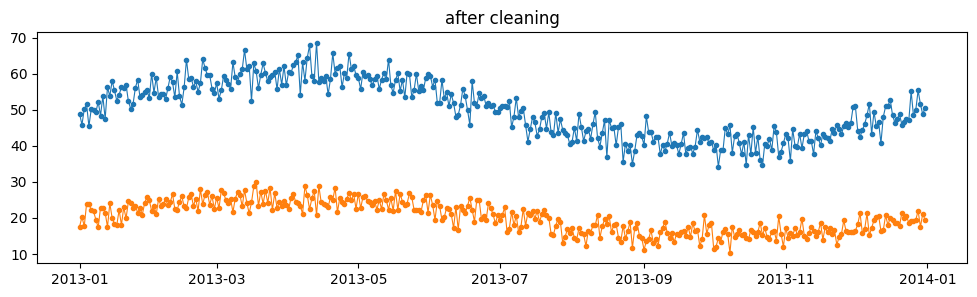

In [141]:
plt.figure(figsize=(12, 3))
plt.plot(df_clean['date'] if 'date' in df_clean.columns else df_clean.index, df_clean[['consumption','temp']], marker='.', linewidth=0.8)
plt.title('after cleaning')
plt.show()

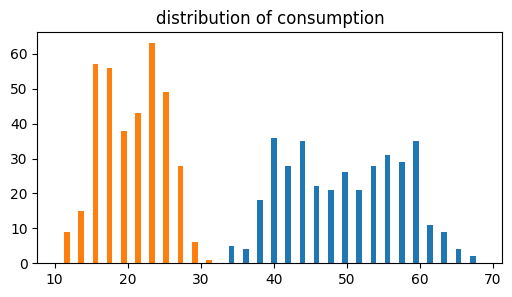

In [142]:
plt.figure(figsize=(6, 3))
plt.hist(df_clean[['consumption', 'temp']], bins=30)
plt.title('distribution of consumption')
plt.show()

In [143]:
df_fill_median = df.copy()
df_fill_median['consumption'] = df_fill_median['consumption'].fillna(df_fill_median['consumption'].median())
display(df_fill_median)

,date,consumption,temp
0,2013-01-01,48.87,17.60
1,2013-01-02,45.84,20.29
2,2013-01-03,50.16,17.71
3,2013-01-04,51.48,23.94
4,2013-01-05,45.42,23.76
...,...,...,...
362,2013-12-29,51.53,17.51
363,2013-12-30,48.74,21.19
364,2013-12-31,50.50,19.45
365,2013-01-21,56.89,19.88


In [144]:
def clean_dataframe(df):
  df_clean = df.copy()
  df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
  df_clean = df_clean.dropna(subset=['date'])
  df_clean = df_clean.drop_duplicates(subset=['date'], keep='first')
  df_clean['consumption'] = pd.to_numeric(df_clean['consumption'], errors='coerce')
  df_clean['temp'] = pd.to_numeric(df_clean['temp'], errors='coerce')
  df_clean['consumption'] = df_clean['consumption'].fillna(df_clean['consumption'].mean())
  df_clean['temp'] = df_clean['temp'].fillna(method='bfill')
  return df_clean

In [145]:
df_clean = clean_dataframe(df)

/tmp/ipython-input-93881058.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['temp'] = df_clean['temp'].fillna(method='bfill')


In [146]:
import numpy as np

In [147]:
df = df.drop_duplicates(subset=['date'], keep='first')
df = df.sort_values('date').reset_index(drop=True)

In [148]:
price = 20 + 5*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,2,len(dates))
df["price"] = price.round(2)

In [149]:
def euro_to_float(x):
  if isinstance(x, str):
    return float(x.replace(',', '.'))
  return x
df['price'] = df['price'].apply(euro_to_float)

In [150]:
display(price)

Index([ 18.16228541048615, 15.435295853150425, 18.350543892081564,
       19.452232189088015, 18.786952718523228,  22.45680485688176,
       21.995418344653345, 18.557040538591686,  20.97221238003278,
        20.26463205363081,
       ...
       15.675756654798809, 18.353012343509484, 17.424645896497488,
       19.201413547103147, 18.401861923372035, 16.994917792067206,
       18.559085638177603, 19.235646845010443, 21.187976936339922,
       21.255562536753995],
      dtype='float64', length=365)

In [151]:
threshold = df_clean['consumption'].mean() + df_clean['consumption'].std()
high_day = df_clean['consumption'] > threshold.sum()
display(high_day)

,consumption
0,False
1,False
2,False
3,False
4,False
...,...
360,False
361,False
362,False
363,False
